In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [171]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.00,1,0,17453,89.1042,C92,C
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.00,1,2,C.A. 2315,20.5750,NaN,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S


In [172]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

# Fill missing age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [174]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [175]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [176]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                           

In [ ]:
# Deal with NaNs, select variables and create test set 

# Select relevant features. Adjust the list as necessary considering the dummy variables
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = titanic_df[features]
y = titanic_df['Survived']  # Target variable


# Split the data into training, development, and test sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)

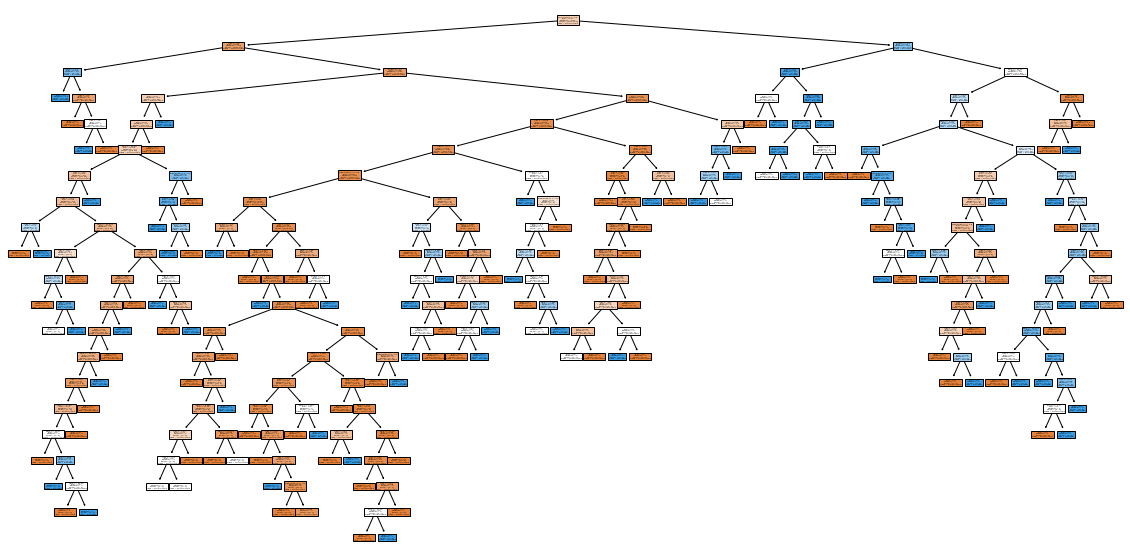

In [178]:
# Train a decision tree without restrictions on the depth
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()

In [179]:
# Predict on the development set and compute accuracy
y_dev_pred = model.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print("Development Set Accuracy:", dev_accuracy)

Development Set Accuracy: 0.8146067415730337


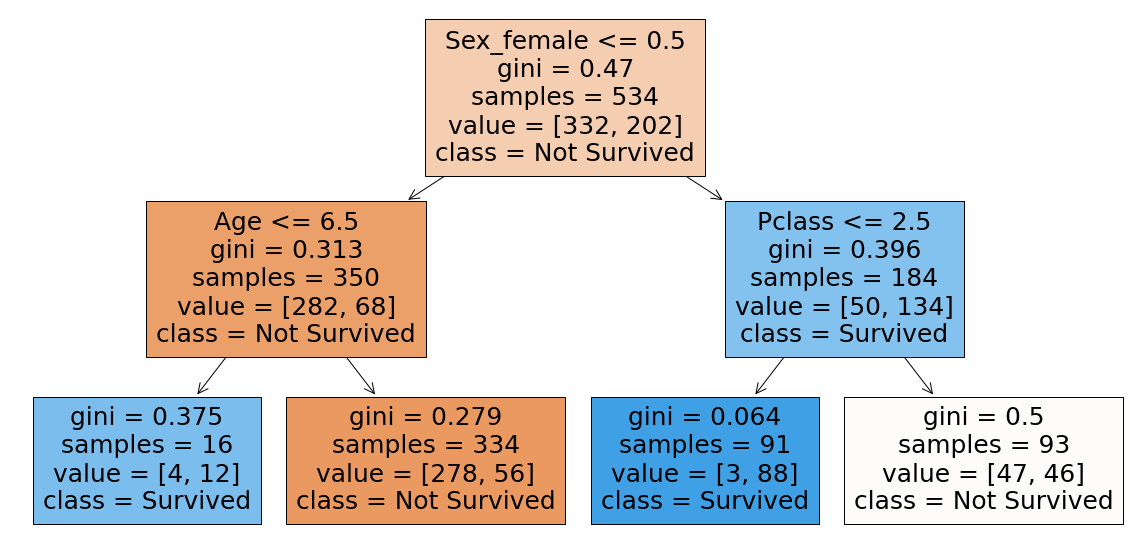

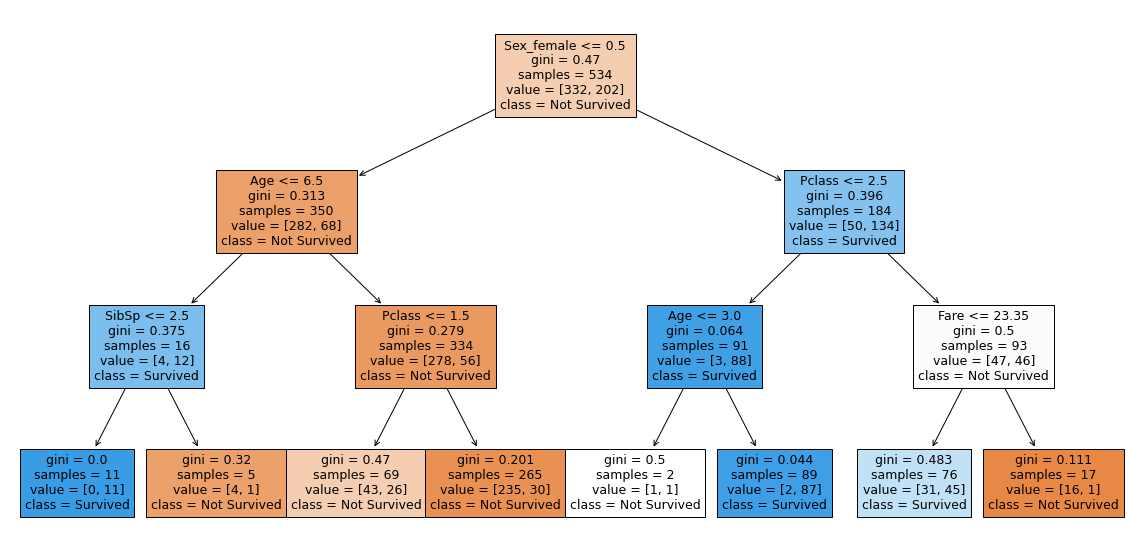

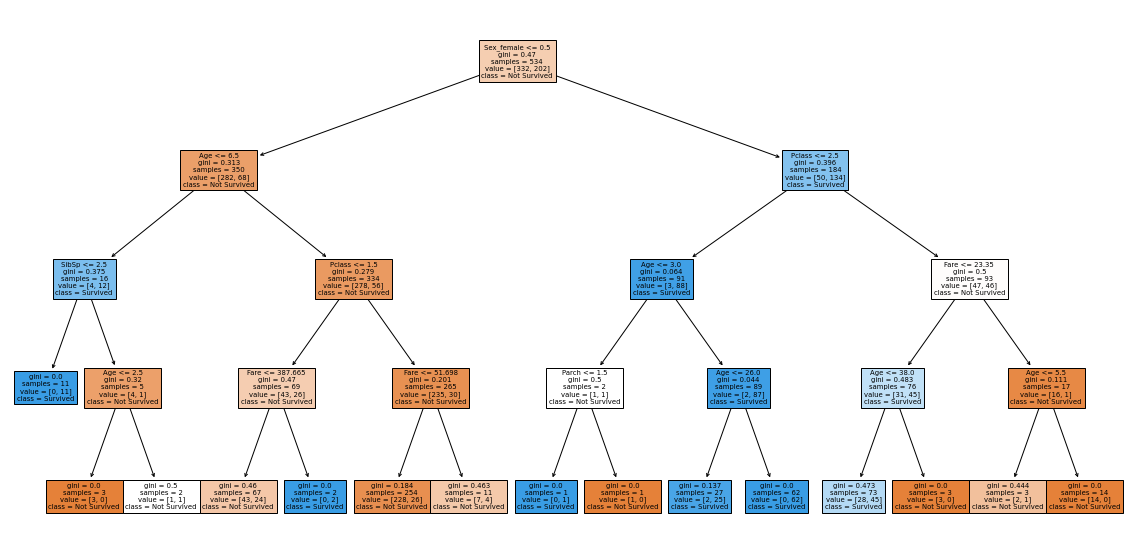

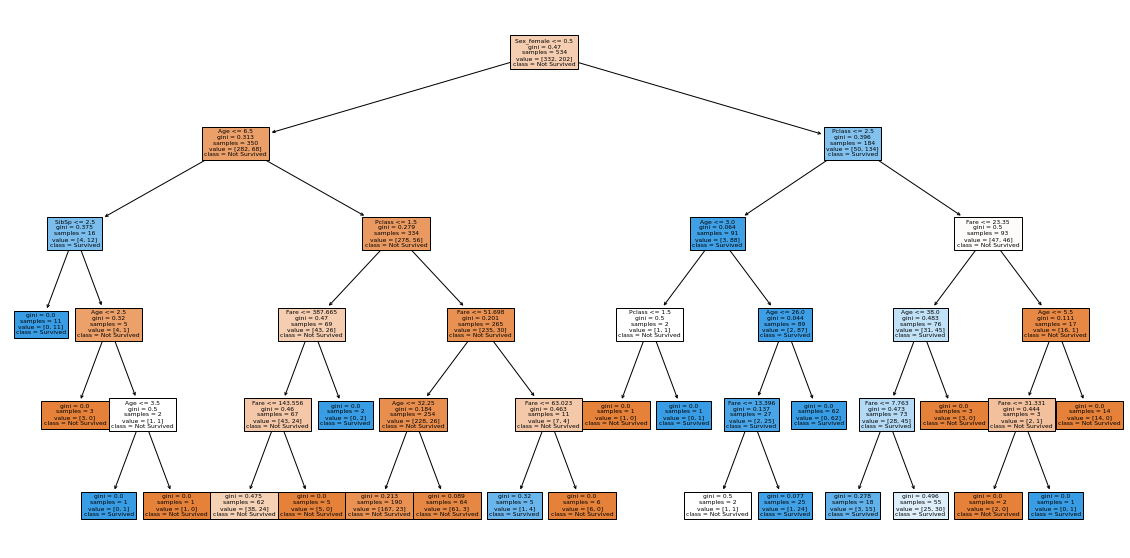

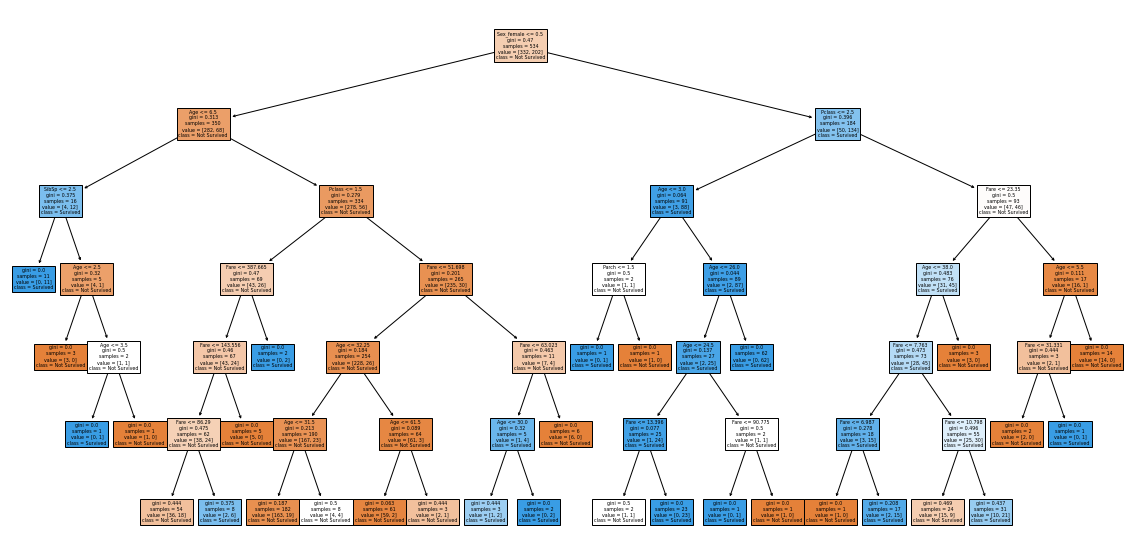

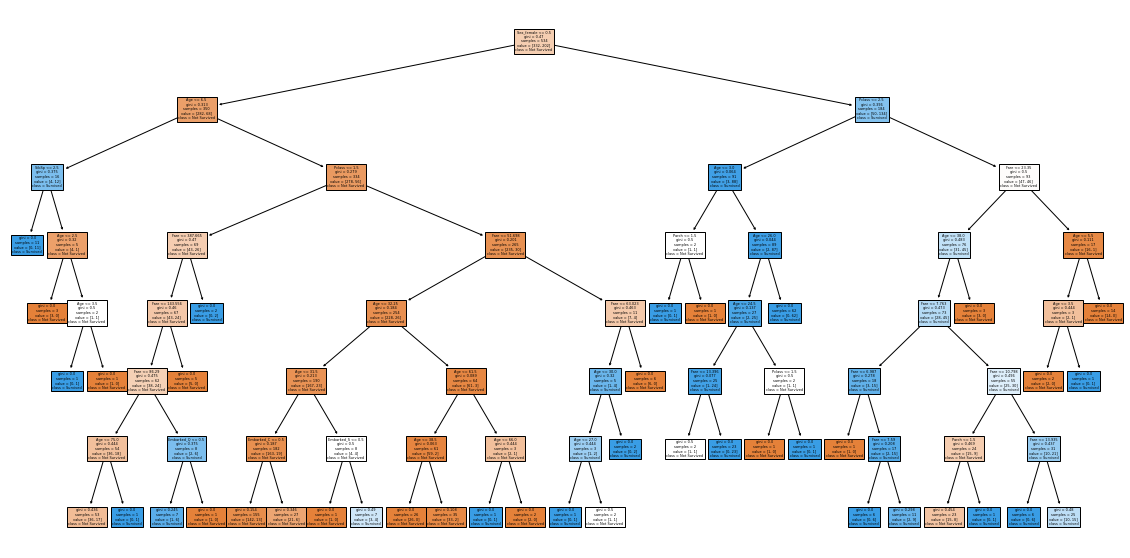

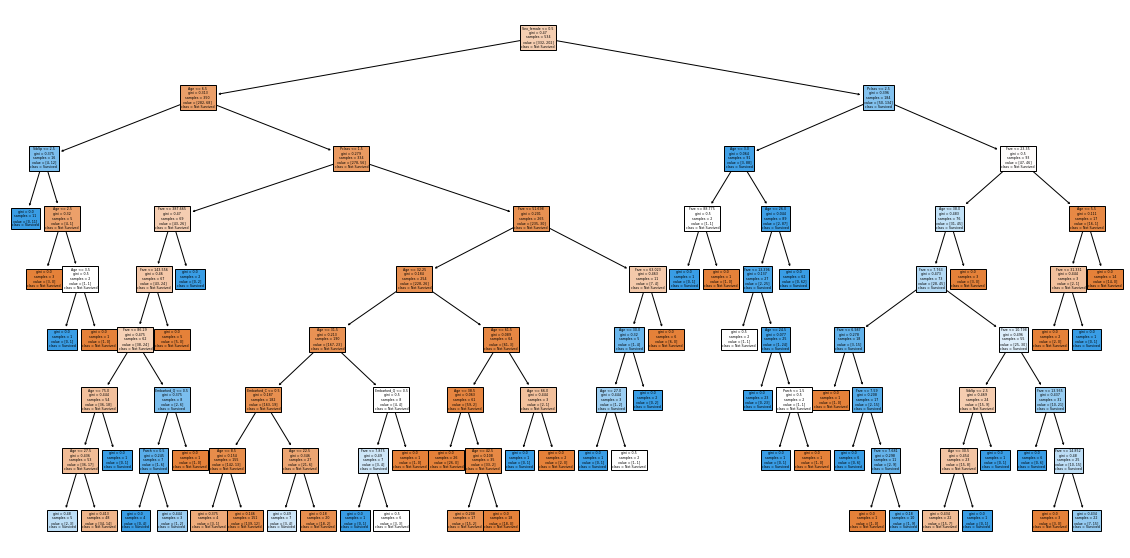

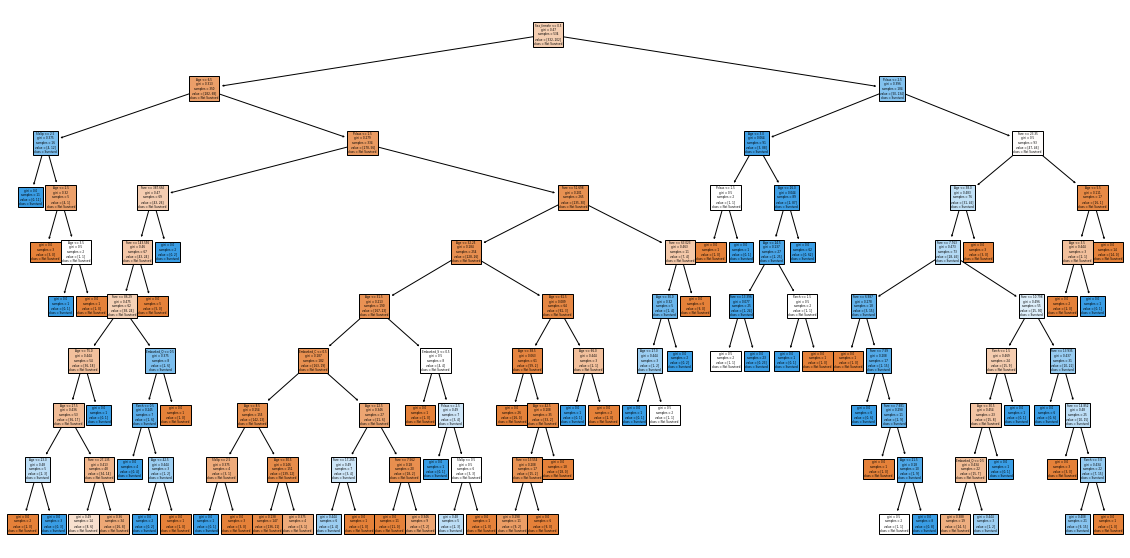

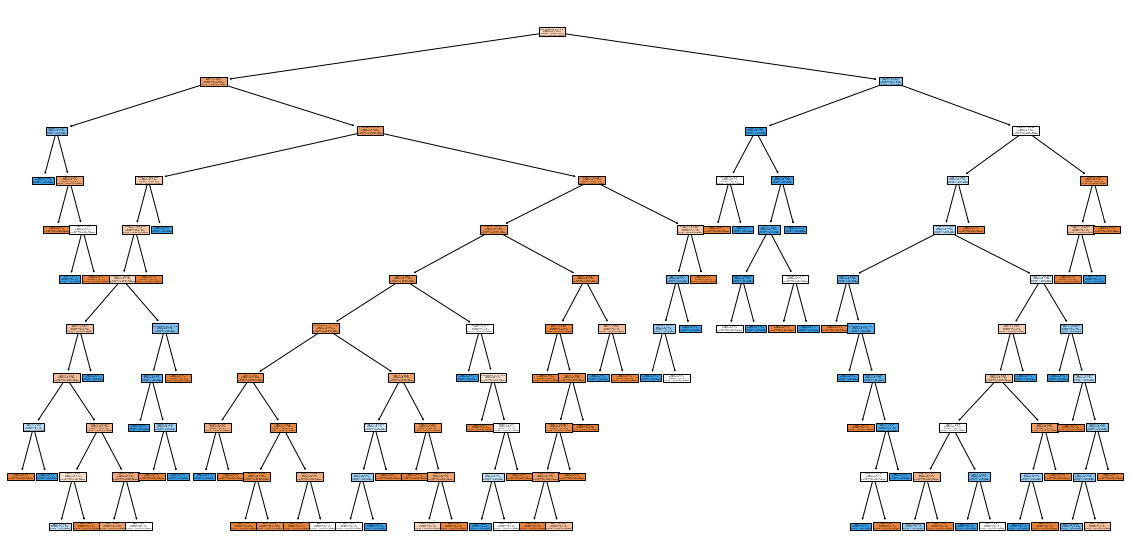

In [180]:
train_accuracies = []
dev_accuracies = []

for depth in range(2, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
    plt.show()
    
    # Store accuracies
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    dev_accuracies.append(accuracy_score(y_dev, model.predict(X_dev)))

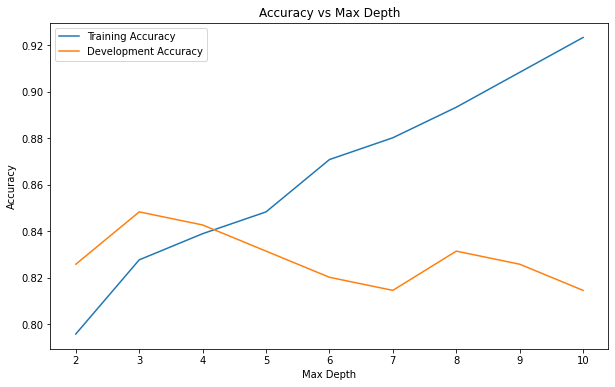

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(2, 11), dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

**Observations**

Development accuracy decreases after max depth drops below 3. This indicates overfitting. Therefore in order to maximise accuracy, a max depth of 3 seems appropriate.

In [186]:
# Train the final Decision Tree model with max_depth of 3
final_model = DecisionTreeClassifier(max_depth=3, random_state=42)
final_model.fit(X_train_dev, y_train_dev)  # X_train_dev and y_train_dev include both training and development data

DecisionTreeClassifier(max_depth=3, random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. DecisionTreeClassifier DecisionTreeClassifier(max_depth=3, random_state=42)

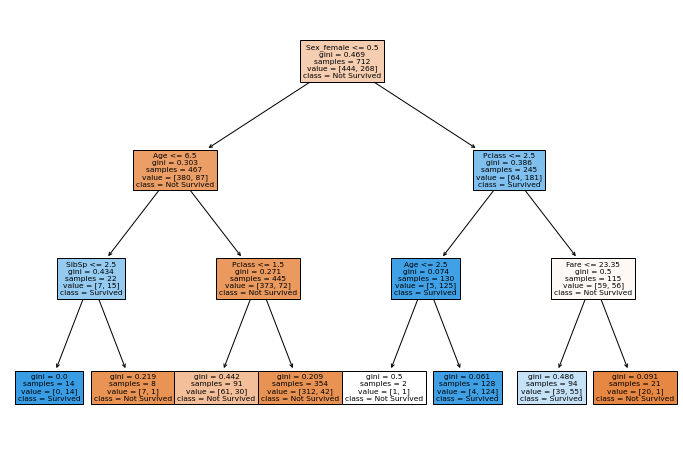

In [187]:
# Visualise model
plt.figure(figsize=(12, 8))
plot_tree(final_model, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()

In [184]:
# Evaluate the model on the test set
y_test_pred = final_model.predict(X_test)
final_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Final Model Test Accuracy:", final_test_accuracy)

Final Model Test Accuracy: 0.7988826815642458
